In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

In [5]:
# Load dataset as train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Feature Scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [24]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
from keras.utils import np_utils

In [35]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [36]:
y_train.shape

(60000, 10)

In [7]:
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from keras import Sequential

# LeNet Architecture

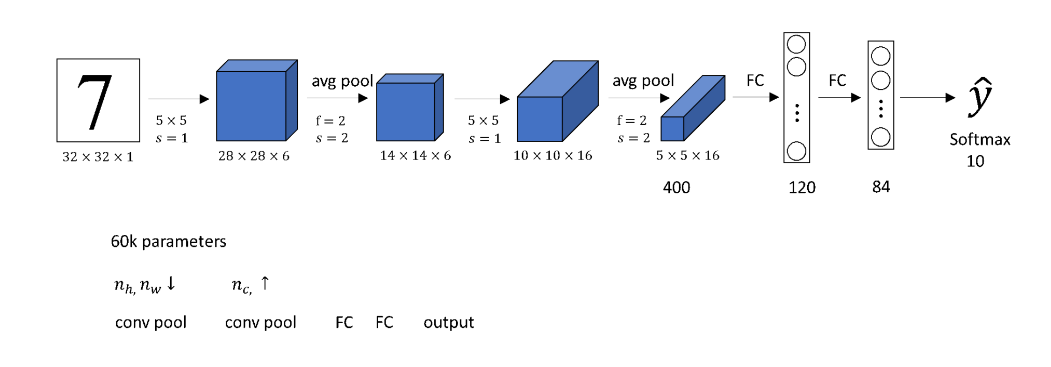*italicized text*

In [37]:
model = Sequential()
# part1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# part2
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# part3

model.add(Flatten())

# part4
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# part5
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_11 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_12 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

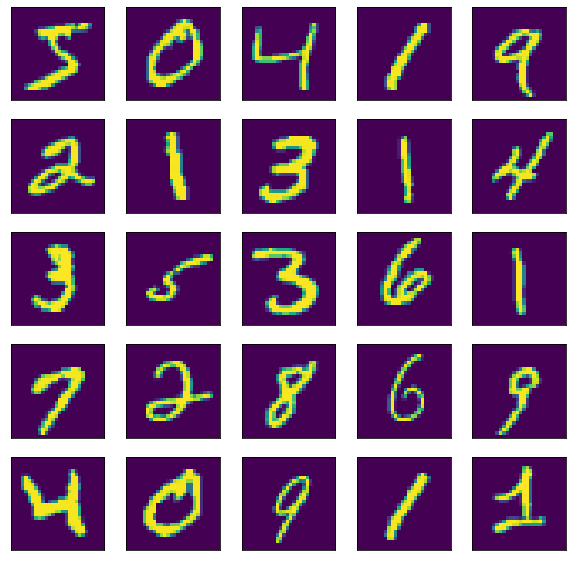

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

In [38]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
469/469 [==============================] - 31s 63ms/step - loss: 0.3488 - accuracy: 0.8983 - val_loss: 0.1616 - val_accuracy: 0.9525
Epoch 2/20
469/469 [==============================] - 25s 53ms/step - loss: 0.1295 - accuracy: 0.9607 - val_loss: 0.0941 - val_accuracy: 0.9703
Epoch 3/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0855 - accuracy: 0.9741 - val_loss: 0.0760 - val_accuracy: 0.9754
Epoch 4/20
469/469 [==============================] - 24s 52ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0631 - val_accuracy: 0.9808
Epoch 5/20
469/469 [==============================] - 26s 55ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0558 - val_accuracy: 0.9816
Epoch 6/20
469/469 [==============================] - 24s 52ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0496 - val_accuracy: 0.9823
Epoch 7/20
469/469 [==============================] - 24s 52ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0525 - val_accuracy:

In [ ]:
# https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [40]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [41]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:09<00:00, 137MB/s]
100% 1.06G/1.06G [00:09<00:00, 117MB/s]


In [42]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()